# COVID-19 Data Analysis 

The COVID-19 pandemic was first detected in Wuhan City, Hubei Province of China. In just a few months the spread of COVID-19 has grown exponentially throughout the world. This notebook shows data analysis of COVID-19.

The following dataset was retrieved from Kaggle, https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#COVID19_line_list_data.csv

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Markdown
width = 1000
pio.renderers.default = "plotly_mimetype+notebook_connected"


In [36]:
import plotly.io as pio
from IPython.display import Image

In [37]:
# Import dataset
df = pd.read_csv('data/covid_19_data.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9735 entries, 0 to 9734
Data columns (total 8 columns):
SNo                9735 non-null int64
ObservationDate    9735 non-null object
Province/State     5302 non-null object
Country/Region     9735 non-null object
Last Update        9735 non-null object
Confirmed          9735 non-null float64
Deaths             9735 non-null float64
Recovered          9735 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 608.6+ KB


In [39]:
# Remove 'Sno' column from dataframe 
df.drop('SNo', axis=1, inplace=True)

In [40]:
# Make a new column for active cases
df['Active Cases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [41]:
# Rename 'Country/Region' column to 'Country'
df.rename(columns = {'Country/Region' : 'Country'}, inplace=True)

# Rename 'ObservationDate' column to 'Date'
df.rename(columns={'ObservationDate': 'Date'}, inplace=True)

In [42]:
# Rename country names
df['Country'] = df['Country'].replace('Mainland China', 'China')
df['Country'] = df['Country'].replace("('St. Martin',)", 'St. Martin')
df['Country'] = df['Country'].replace('Bahamas, The', 'The Bahamas')
df['Country'] = df['Country'].replace('occupied Palestinian territory', 'Palestine')

# Replace nan values in 'Province/State' column to ''
df['Province/State'] = df['Province/State'].fillna('')

In [43]:
# Group confirmed, deaths, recovered and active cases by observation date
grp_by_date = df.groupby('Date')['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active Cases'].sum().reset_index()

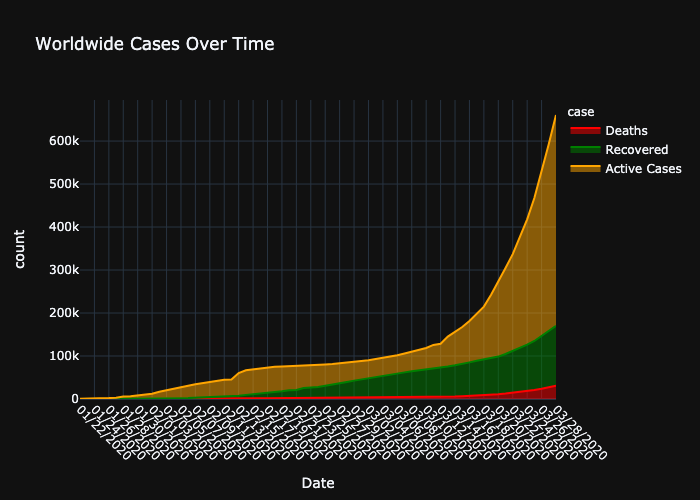

In [44]:
color1 = ['red']
color2 = ['red', 'green', 'orange']

graph = px.line(grp_by_date, x='Date', y='Confirmed', title= 'Confirmed Cases Worldwide', template="plotly_dark" , color_discrete_sequence = color1)
graph.update_xaxes(tickangle=45)
graph.show()

graph = px.line(grp_by_date, x='Date', y='Active Cases', title= 'Active Cases Worldwide', template="plotly_dark", color_discrete_sequence = color1 )
graph.update_xaxes(tickangle=45)
graph.show()

graph = px.line(grp_by_date, x='Date', y='Deaths', title= 'Deaths Worldwide', template="plotly_dark", color_discrete_sequence = color1 )
graph.update_xaxes(tickangle=45)
graph.show()

df_melt = grp_by_date.melt(id_vars='Date', value_vars=['Deaths', 'Recovered', 'Active Cases'], var_name='case', value_name='count')
graph = px.area(df_melt, x='Date' , y='count' , color='case', title='Worldwide Cases Over Time', template="plotly_dark", color_discrete_sequence = color2)
graph.update_xaxes(tickangle=45)
graph.show()

Image(pio.to_image(graph, format='png'))

The following line graphs above illustrate the timeline of COVID-19 from January 22 2020 to March 28 2020. In the last month there has been a significant increase in confirmed cases. 

In [45]:
# Use latest results for data visualizations. 
latest_results = df[df['Date'] == max(df['Date'])]

grp_by_country = latest_results.groupby('Country')['Confirmed', 'Deaths', 'Recovered', 'Active Cases'].sum().reset_index()

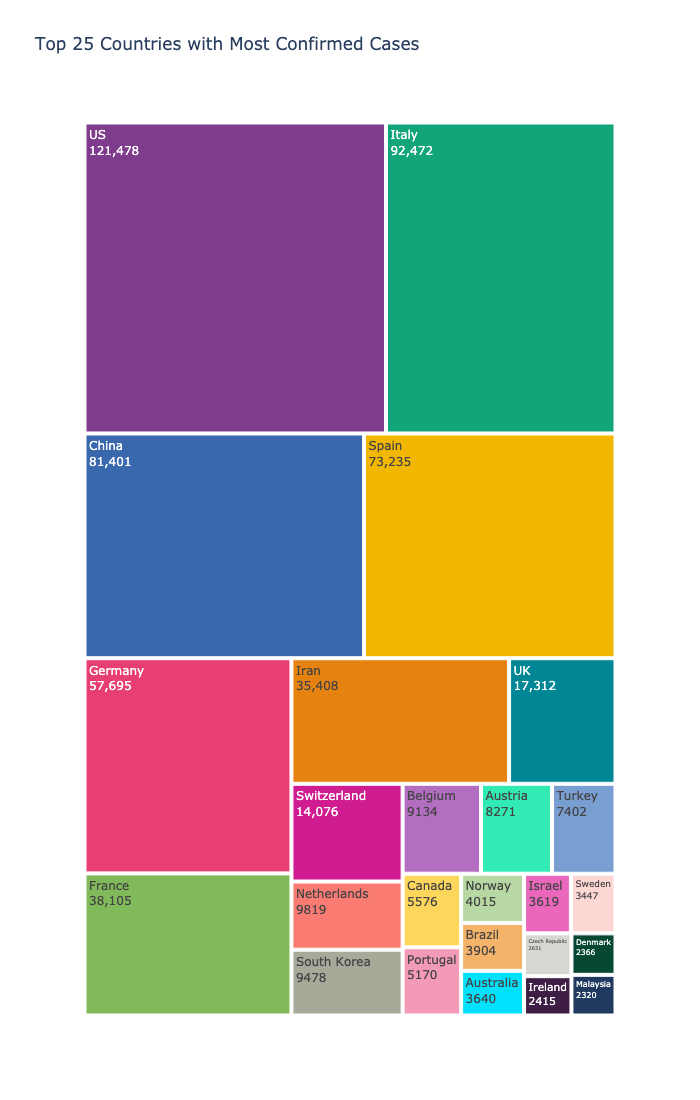

In [46]:
grp_by_country_sort = grp_by_country.sort_values(by= 'Confirmed', ascending = False)
tree_map = px.treemap(grp_by_country_sort.head(25), path = ['Country'], values = 'Confirmed', 
                      title = 'Top 25 Countries with Most Confirmed Cases', height = 1100,
                      color_discrete_sequence = px.colors.qualitative.Bold)
tree_map.data[0].textinfo = 'label+value'
tree_map.show()

Image(pio.to_image(tree_map, format='png'))

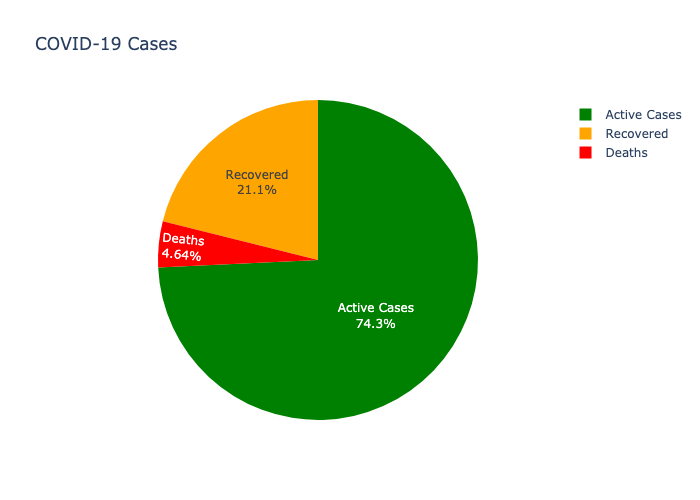

In [47]:
labels = ['Deaths', 'Recovered', 'Active Cases']
deaths_total = grp_by_country['Deaths'].sum()
recovered_total = grp_by_country['Recovered'].sum()
active_cases = grp_by_country['Active Cases'].sum()
values = [deaths_total, recovered_total, active_cases]

colors = ['red', 'orange', 'green']

pie_chart = px.pie(grp_by_country, names=labels, values=values, 
                              title='COVID-19 Cases'
                            )
pie_chart.update_traces(textposition='inside', textinfo='percent+label', marker_colors = colors)


pie_chart.show()

Image(pio.to_image(pie_chart, format='png'))

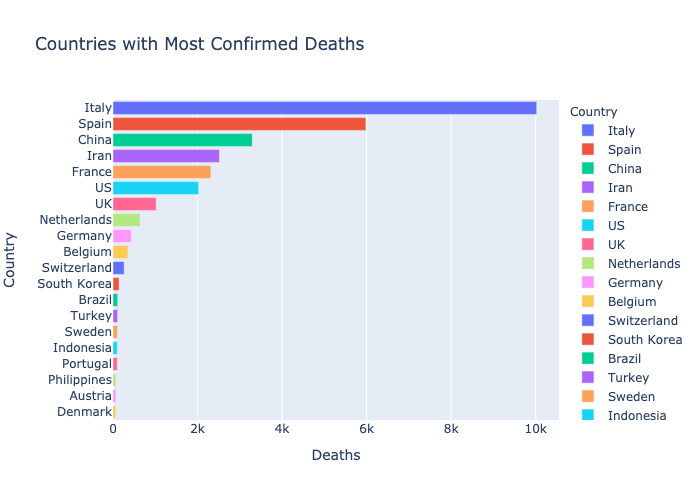

In [48]:
grp_by_country.sort_values(by='Confirmed', ascending=False, inplace=True)
bar_graph = px.bar(grp_by_country[:20], 
                   x= 'Confirmed', y = 'Country', title= 'Countries with Most Confirmed Cases', 
                   orientation = 'h', color = 'Country'
                  )
bar_graph.show()

color1 = ['red']
bar_graph = px.bar(grp_by_country.sort_values('Deaths', ascending=False)[:20], 
                   x= 'Deaths', y = 'Country', title= 'Countries with Most Confirmed Deaths', 
                   orientation = 'h', color = 'Country'
                  )
bar_graph.show()

Image(pio.to_image(bar_graph, format='png'))

As of March 28 2020, USA has the most confirmed cases of COVID-19 and Italy has the most confirmed deaths.

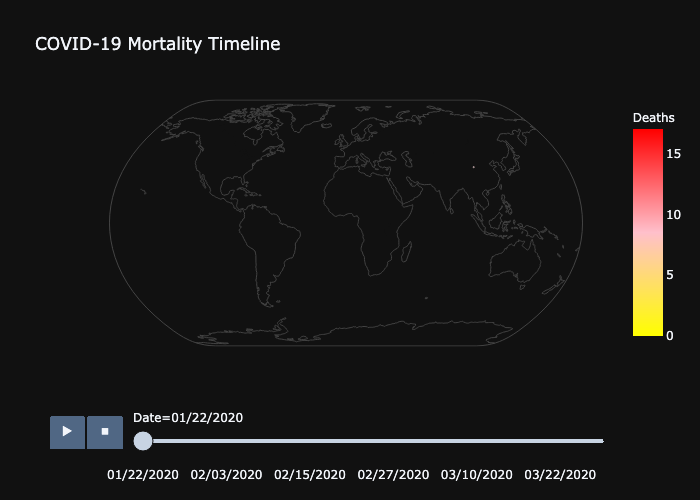

In [49]:
grp_by_country_and_date = df.groupby(['Date', 'Country'])['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active Cases'].sum().reset_index()


world_map = px.scatter_geo(grp_by_country_and_date, locations="Country",
                     color= 'Confirmed', 
                     locationmode='country names',
                     hover_name="Country", 
                     size="Confirmed", 
                     template="plotly_dark",
                     animation_frame= 'Date',
                     color_continuous_scale=["yellow", "pink", "red"],
                     title = 'COVID-19 Confirmed Cases Timeline',
                     projection="natural earth")

world_map.show()

world_map = px.scatter_geo(grp_by_country_and_date, locations="Country",
                     color= 'Deaths',
                     locationmode='country names',
                     hover_name="Deaths", 
                     size="Deaths", 
                     template="plotly_dark",
                     animation_frame= 'Date',
                     color_continuous_scale=["yellow", "pink", "red"],
                     title = 'COVID-19 Mortality Timeline',
                     projection="natural earth")

world_map.show()

Image(pio.to_image(world_map, format='png'))

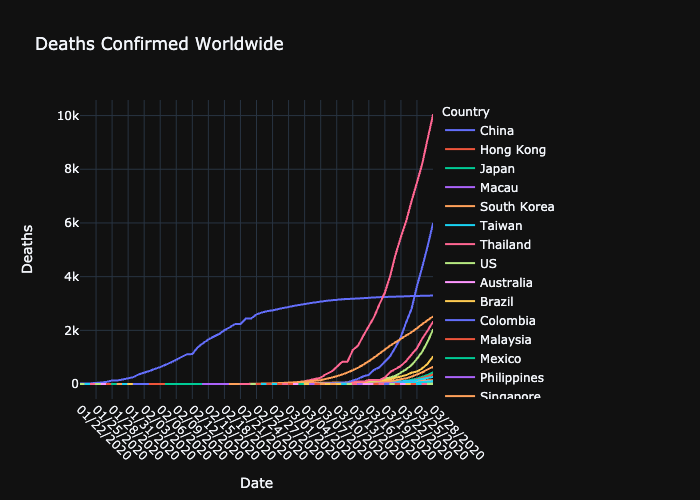

In [50]:
graph = px.line(grp_by_country_and_date, x='Date', y='Confirmed', color = 'Country', title= 'Confirmed Cases Worldwide', template="plotly_dark")
graph.update_xaxes(tickangle=45)
graph.show()

graph = px.line(grp_by_country_and_date, x='Date', y='Deaths', color = 'Country', title= 'Deaths Confirmed Worldwide', template="plotly_dark" )
graph.update_xaxes(tickangle=45)
graph.show()

Image(pio.to_image(graph, format='png'))

The following two line graphs show a visualization of confirmed cases and confirmed deaths by country. As of March 28 2020, China and South Korea have flattened their curve for confirmed cases however other countries are seeing significant exponential growth. 

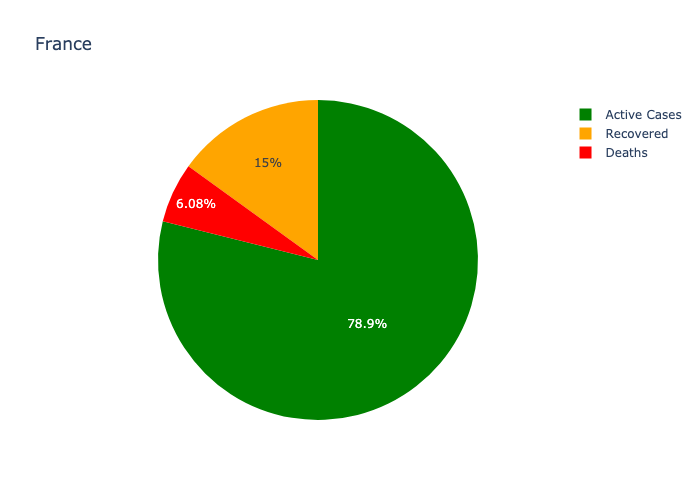

In [51]:
grp_by_country_idx = grp_by_country.set_index('Country')

China = grp_by_country_idx[grp_by_country_idx.index == "China"]
USA = grp_by_country_idx[grp_by_country_idx.index == "US"]
Italy = grp_by_country_idx[grp_by_country_idx.index == "Italy"]
Spain = grp_by_country_idx[grp_by_country_idx.index == "Spain"]
Germany = grp_by_country_idx[grp_by_country_idx.index == "Germany"]
France = grp_by_country_idx[grp_by_country_idx.index == "France"]


labels = ['Deaths', 'Recovered', 'Active Cases']
deaths_total = China['Deaths'].sum()
recovered_total = China['Recovered'].sum()
active_cases = China['Active Cases'].sum()
values = [deaths_total, recovered_total, active_cases]
pie_chart = px.pie(China, names=labels, values=values, 
                   color_discrete_sequence = ['green', 'red', 'orange'], title='China')
pie_chart.show()


labels = ['Deaths', 'Recovered', 'Active Cases']
deaths_total = USA['Deaths'].sum()
recovered_total = USA['Recovered'].sum()
active_cases = USA['Active Cases'].sum()
values = [deaths_total, recovered_total, active_cases]

pie_chart = px.pie(USA, names=labels, values=values, 
                   color_discrete_sequence = ['green', 'red', 'orange'], title='USA')
pie_chart.show()


labels = ['Deaths', 'Recovered', 'Active Cases']
deaths_total = Italy['Deaths'].sum()
recovered_total = Italy['Recovered'].sum()
active_cases = Italy['Active Cases'].sum()
values = [deaths_total, recovered_total, active_cases]
pie_chart = px.pie(Italy, names=labels, values=values, 
                   color_discrete_sequence = ['green', 'orange', 'red'], title='Italy')
pie_chart.show()


labels = ['Deaths', 'Recovered', 'Active Cases']
deaths_total = Spain['Deaths'].sum()
recovered_total = Spain['Recovered'].sum()
active_cases = Spain['Active Cases'].sum()
values = [deaths_total, recovered_total, active_cases]
pie_chart = px.pie(Spain, names=labels, values=values, 
                   color_discrete_sequence = ['green', 'orange', 'red'], title='Spain')
pie_chart.show()

labels = ['Deaths', 'Recovered', 'Active Cases']
deaths_total = Germany['Deaths'].sum()
recovered_total = Germany['Recovered'].sum()
active_cases = Germany['Active Cases'].sum()
values = [deaths_total, recovered_total, active_cases]
pie_chart = px.pie(Germany, names=labels, values=values, 
                   color_discrete_sequence = ['green', 'orange', 'red'], title='Germany')
pie_chart.show()

labels = ['Deaths', 'Recovered', 'Active Cases']
deaths_total = France['Deaths'].sum()
recovered_total = France['Recovered'].sum()
active_cases = France['Active Cases'].sum()
values = [deaths_total, recovered_total, active_cases]
pie_chart = px.pie(France, names=labels, values=values, 
                   color_discrete_sequence = ['green', 'orange', 'red'], title='France')
pie_chart.show()

Image(pio.to_image(pie_chart, format='png'))

The figure above shows the top 6 countries with the most confirmed cases and the following pie charts which break down the percentage of active cases, total recovered, and the total number of deaths.